# Project: Unsupervised Learning


*Author: Archita Kothari*

In [ ]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans

import sklearn
import sklearn.metrics

For this project, I have used the Credit Card Customer Data.

## Background: 
AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.
Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

## About the data:
The data has customers as a data points with the following features-
- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit(currency less)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## Resources

- Kmeans documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- GMM documentation - https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- DBSCAN - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


### 1. Import all libraries and dataset


In [ ]:
import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

In [ ]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

### 2. Explore the dataset

In [ ]:
df.shape

(660, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
# check for the duplicate 
df.duplicated().sum()

0

In [ ]:
# no duplicates, lets check for missing values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
# The uniques in each column. 
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Inference from the above observation about the Customer Key feature**

Among 660 Customers' entries, 655 customers are unique. That means only 5 customers' entries are either repeated or same Cutomer Keys are given to multiple. 

In [ ]:
# There are some duplicates in customer key. Let us explore

duplicate_keys = df['Customer Key'].duplicated()
df[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [ ]:
# let us just drop them for simplicity.

df = df[~duplicate_keys]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  655 non-null int64
Customer Key           655 non-null int64
Avg_Credit_Limit       655 non-null int64
Total_Credit_Cards     655 non-null int64
Total_visits_bank      655 non-null int64
Total_visits_online    655 non-null int64
Total_calls_made       655 non-null int64
dtypes: int64(7)
memory usage: 40.9 KB


### 3. Drop the columns Sl_No and Customer Key


In [ ]:
# We have done some basic checks. Now let us drop the variables that are not required
df.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [ ]:
df.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4


In [ ]:
#check for duplicates now. Duplicates would mean customers with identical features

df[df.duplicated()]


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [ ]:
#let us drop these too
df=df[~df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 659
Data columns (total 5 columns):
Avg_Credit_Limit       644 non-null int64
Total_Credit_Cards     644 non-null int64
Total_visits_bank      644 non-null int64
Total_visits_online    644 non-null int64
Total_calls_made       644 non-null int64
dtypes: int64(5)
memory usage: 30.2 KB


### 4. Visualise through box plot 

- Extracted the features(column names) of the df in a list
- Wrote the function below that takes the above list of column names and the df and plots the boxplot for all the features
- Call the function with the features and the df

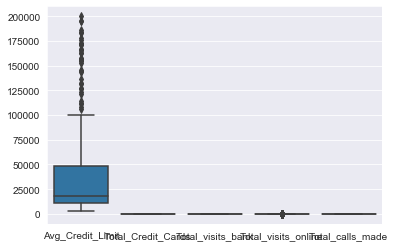

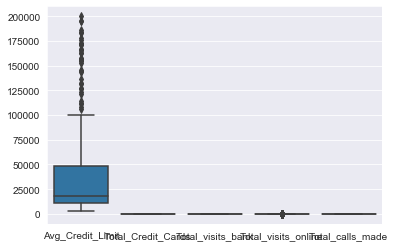

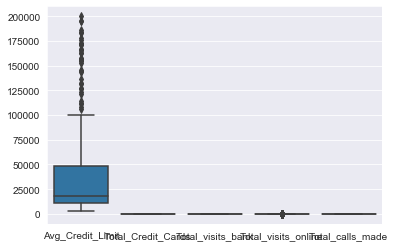

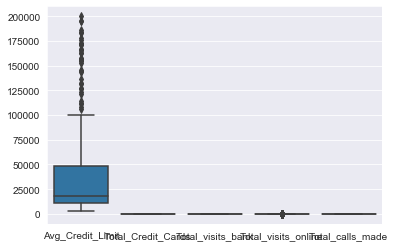

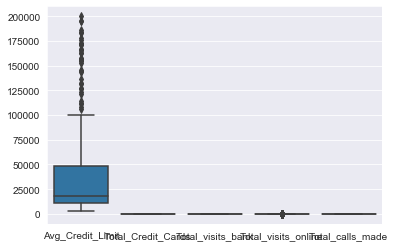

In [ ]:
#We will use the boxplot for these

features = list(df.columns)

#terate through the features plot the boxplot for all the featrues one by one.

def boxplots_plot(features, df):
    for i in features:
        sns.boxplot(data = df)
        plt.show()
  
boxplots_plot(features, df)

### 5. The correlation heatmap with annotation

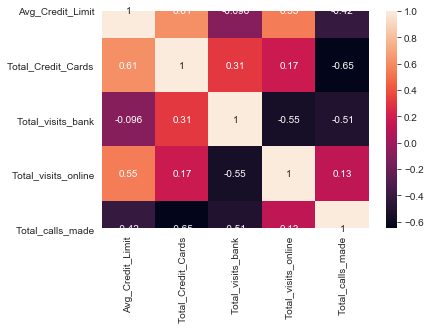

In [ ]:
# We see that there are some outliers in the Average credit limit and total visits online features
# A correlation heatmap

sns.heatmap( df.corr(), annot = True)

### 6. Scaled the dataset, created a dataframe for the scaled value and displayed the top 3 entries


In [ ]:
# used the fit tranform function on the original dataframe
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = mms.fit_transform(df)

# creating the dataframe of scaled values
df_scaled = pd.DataFrame(df_scaled)

# use the stored feature names to define the column names for the new dataframe
df_scaled.columns = features

# print the top3 entries in the scaled data frame
df_scaled.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.49,0.11,0.20,0.07,0.00
1,0.24,0.22,0.00,0.67,0.90
2,0.24,0.67,0.20,0.20,0.40


In [ ]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.00,0.16,0.19,0.00,0.04,0.08,0.23,1.00
Total_Credit_Cards,644.00,0.41,0.24,0.00,0.22,0.44,0.56,1.00
Total_visits_bank,644.00,0.48,0.33,0.00,0.20,0.40,0.80,1.00
Total_visits_online,644.00,0.17,0.20,0.00,0.07,0.13,0.27,1.00
Total_calls_made,644.00,0.36,0.29,0.00,0.10,0.30,0.53,1.00


### 7. Elbow Plot

#### K-Means clustering

Now that we have scaled, let us explore KMeans clustering.

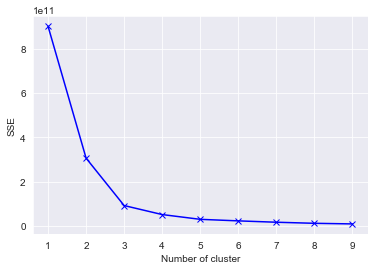

In [ ]:
# Steps:
# 1. Inititalise a dictionary to store the SSE for each k.
# 2. Run for a range of Ks and store SSE for each run
# 3. Plot the SSE vs K and find the elbow

# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fir the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=12).fit(df[features])
    sse[k] = kmeans.inertia_

# step 3

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### 8. Fit the KMeans clustering on the df_scaled data with n_clusters = 3 and stored the predictions in the columns 'Labels'

In [ ]:
# Looking at the plot, we can say that for k=3 or 4, elbow point is achieved.
# Fit the kmeans again with k=3 to get the labels

kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=12)

kmeans.fit(df_scaled)
df_scaled['Labels'] = kmeans.predict(df_scaled) 

### 9. Generated the boxplot for all the features that cleary differentiates among the clusters

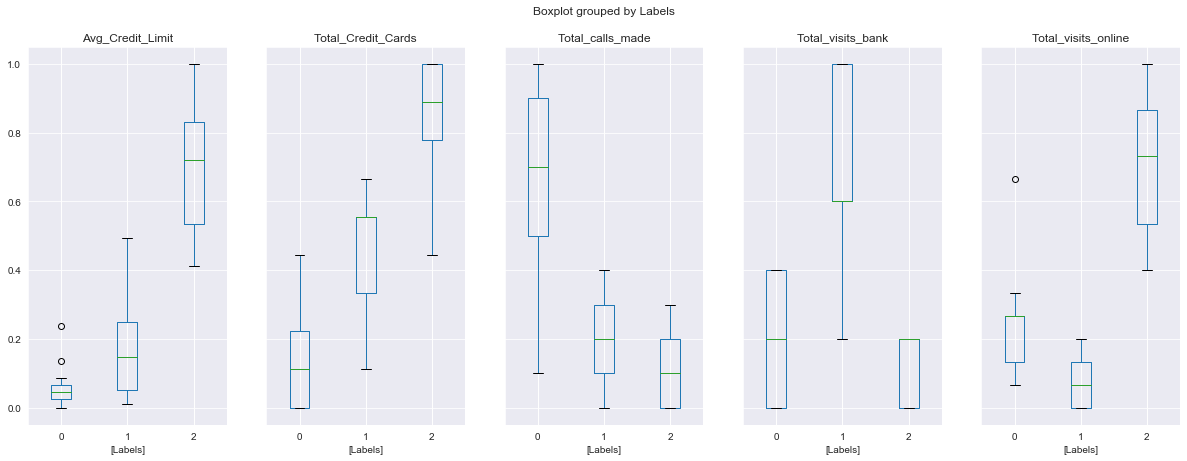

In [ ]:
# The labels should be fed to the 'by' attribute 

df_scaled.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

### 10. Implement the Gaussian Mixture Model clustering and generate the boxplot as above

- Fit the algorithm with 3 n_components. Predict on the scaled data and store the results as GmmLabels.
- Generate the boxplots to understand the clusters similar to the one generated for the kmeans.


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 12)
gmm.fit(df_scaled) 
df_scaled['GmmLabels'] = gmm.predict(df_scaled)

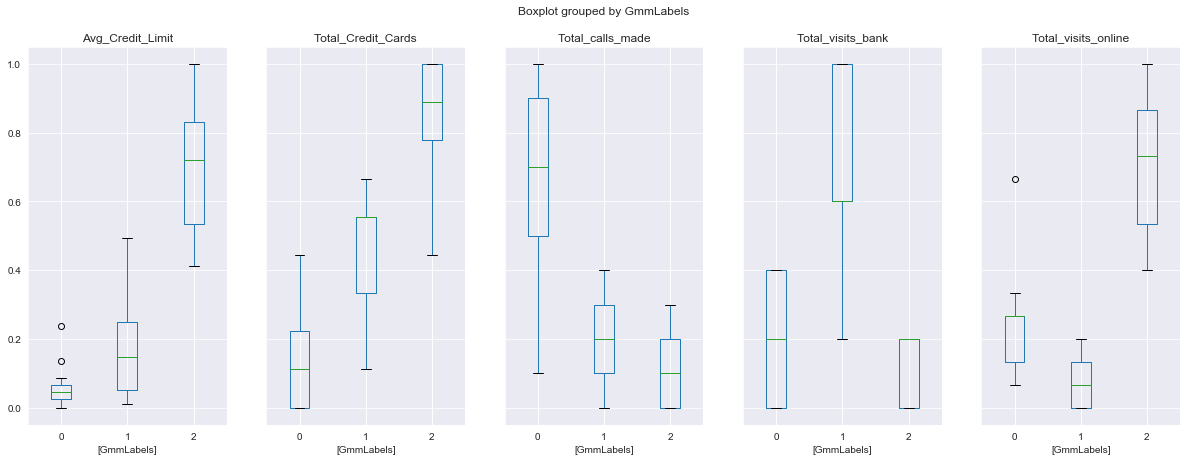

In [ ]:
# plotting boxplots with the new GMM based labels

new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","GmmLabels"]

df_scaled[new_features].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

### 11. Use the DBSCAN clustering with the eps = 0.5 and other parameters as default on the scaled data. Report the number of clusters formed.


In [ ]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.5)

df_scaled['DBSLabels'] = dbs.fit_predict(df_scaled)
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,GmmLabels,DBSLabels
0,0.49,0.11,0.20,0.07,0.00,1,1,0
1,0.24,0.22,0.00,0.67,0.90,0,0,1
2,0.24,0.67,0.20,0.20,0.40,1,1,0
3,0.14,0.44,0.20,0.07,0.40,0,0,1
4,0.49,0.56,0.00,0.80,0.30,2,2,2


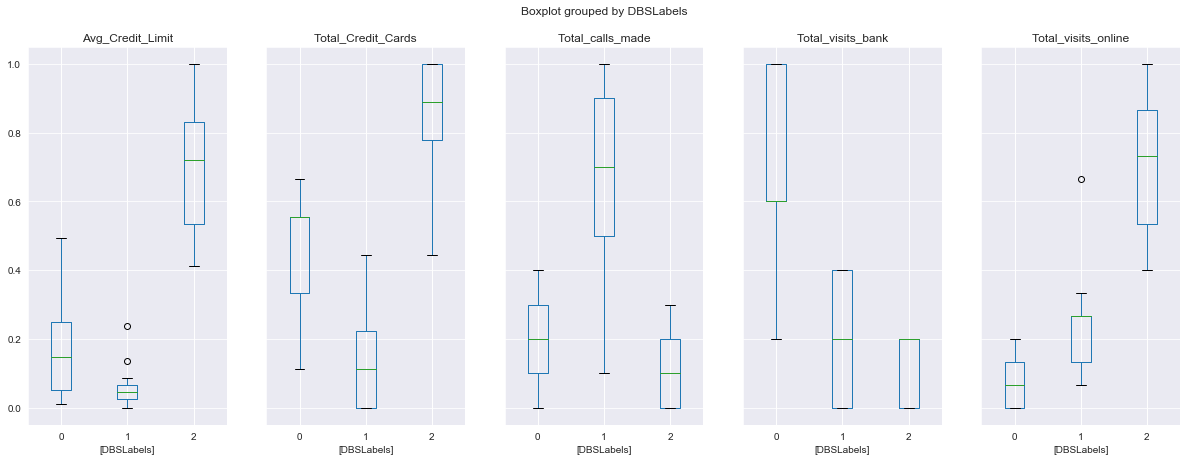

In [ ]:
#plotting boxplots with the new DBScan based labels

new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","DBSLabels"]

df_scaled[new_features].boxplot(by = 'DBSLabels', layout = (1,5),figsize=(20,7))
plt.show()

### 12. Printing the cluster sizes and adding comments from the different clustering techniques



In [ ]:
print('Cluster sizes in Kmeans:')
print(df_scaled['Labels'].count())
print()

print('Cluster sizes in GMM:')
print(df_scaled['GmmLabels'].count())
print()

print('Cluster sizes in DBSCAN')
print(df_scaled['DBSLabels'].count())

Cluster sizes in Kmeans:
644

Cluster sizes in GMM:
644

Cluster sizes in DBSCAN
644


#### Comments and interpretations

We are getting the same cluster Size for all 3, Kmeans, GMM and DBSCAN techniques. 

From the Boxplot we can determine that Gaussian Mixture Model and Kmean have the similarity in the plot. In the DBSCAN, if the 0 and 1 are swapped then the plot is similar to the Kmean and Gaussian Mixture Model. It can be determined that for this data, taking eps = 5 in DBSCAN gives as similaraity in the result with GMM and Kmean if n_components and n_clusters are taken 3.